Note: 
    
    What hints we have in data and how we can reuse some more features

# Import libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append("../..")

# Import data

#### define paths to data

In [2]:
path_hash_data = "../../data/HASH_and_target_time_series.parquet"
path_centrobank_data = "../../data/Kluch_stavka_and_Inflation.csv"
path_rub_to_usd_and_yuan_data = "../../data/kurs_rub_to_usd_and_uan.csv"
path_urals_in_usd_data = "../../data/urals_oil_price.csv"

#### read data

In [3]:
df_hash_data = pd.read_parquet(path_hash_data)
# df_centrobank_data = pd.read_csv(path_centrobank_data, sep=";")
df_curs_data = pd.read_csv(path_rub_to_usd_and_yuan_data)
df_urals_money_data = pd.read_csv(path_urals_in_usd_data)

#### check data

In [4]:
df_urals_money_data.head()

,data,price
0,01.01.2017,53.42
1,01.02.2017,53.67
2,01.03.2017,49.94
3,01.04.2017,51.55
4,01.05.2017,49.04


In [5]:
df_hash_data.head()

,HASH,real_weight,real_wagon_count
2017-01-01,0,5620.0,81.0
2017-02-01,0,15929.0,229.0
2017-03-01,0,17221.0,248.0
2017-04-01,0,15703.0,226.0
2017-05-01,0,3895.0,56.0


In [6]:
# df_centrobank_data.head()

In [7]:
df_curs_data.head()

,data,rub-usd,rub-uan
0,2017-01-01,59,8
1,2017-02-01,58,8
2,2017-03-01,58,8
3,2017-04-01,56,8
4,2017-05-01,56,8


# Transform addtional features time to expected format

In [8]:
df_curs_data.index = pd.to_datetime(df_curs_data.data, yearfirst=True)
df_curs_data = df_curs_data.drop(axis=1, columns=['data'])

In [9]:
df_urals_money_data.index = pd.to_datetime(df_urals_money_data.data, dayfirst=True)
df_urals_money_data = df_urals_money_data.drop(axis=1, columns=["data"])

In [10]:
df_additional_features = pd.merge(df_urals_money_data, df_curs_data, left_index=True, right_index=True)

In [11]:
df_additional_features = df_additional_features.rename(columns={"price": "price_urals_usd"})

# Merge two dataframes (HASH) and (add features)

In [12]:
df = pd.merge(df_hash_data, df_additional_features, left_index=True, right_index=True)
df

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
2017-01-01,0,5620.0,81.0,53.42,59,8
2017-01-01,1,487.0,7.0,53.42,59,8
2017-01-01,2,1067.0,16.0,53.42,59,8
2017-01-01,3,335.0,5.0,53.42,59,8
2017-01-01,4,133.0,2.0,53.42,59,8
...,...,...,...,...,...,...
2023-03-01,75084,1056.0,16.0,49.74,76,11
2023-03-01,75085,134.0,2.0,49.74,76,11
2023-03-01,75086,134.0,2.0,49.74,76,11
2023-03-01,75087,52.0,1.0,49.74,76,11


In [13]:
# df.to_parquet('../../data_additionalfeatures_and_hash_for_simple_start.parquet')

# Plot some intersting hints

#### Filter dataframe to work with data only after 2020.03

In [14]:
df = df[df.index >= pd.to_datetime("2020-03-01", yearfirst=True)]

In [15]:
df.head()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
2020-03-01,0,17490.0,249.0,29.51,73,10
2020-03-01,1,69.0,1.0,29.51,73,10
2020-03-01,2,1532.0,23.0,29.51,73,10
2020-03-01,3,597.0,9.0,29.51,73,10
2020-03-01,4,131.0,2.0,29.51,73,10


In [16]:
df.corr()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
HASH,1.000000e+00,-0.063083,-0.064932,6.310675e-14,7.045275e-15,2.105156e-14
real_weight,-6.308306e-02,1.000000,0.998963,6.689415e-05,4.862752e-04,5.115696e-04
real_wagon_count,-6.493243e-02,0.998963,1.000000,-5.078554e-05,4.905368e-04,4.870220e-04
price_urals_usd,6.310675e-14,0.000067,-0.000051,1.000000e+00,-6.779487e-02,1.372403e-01
rub-usd,7.045275e-15,0.000486,0.000491,-6.779487e-02,1.000000e+00,9.587394e-01
rub-uan,2.105156e-14,0.000512,0.000487,1.372403e-01,9.587394e-01,1.000000e+00


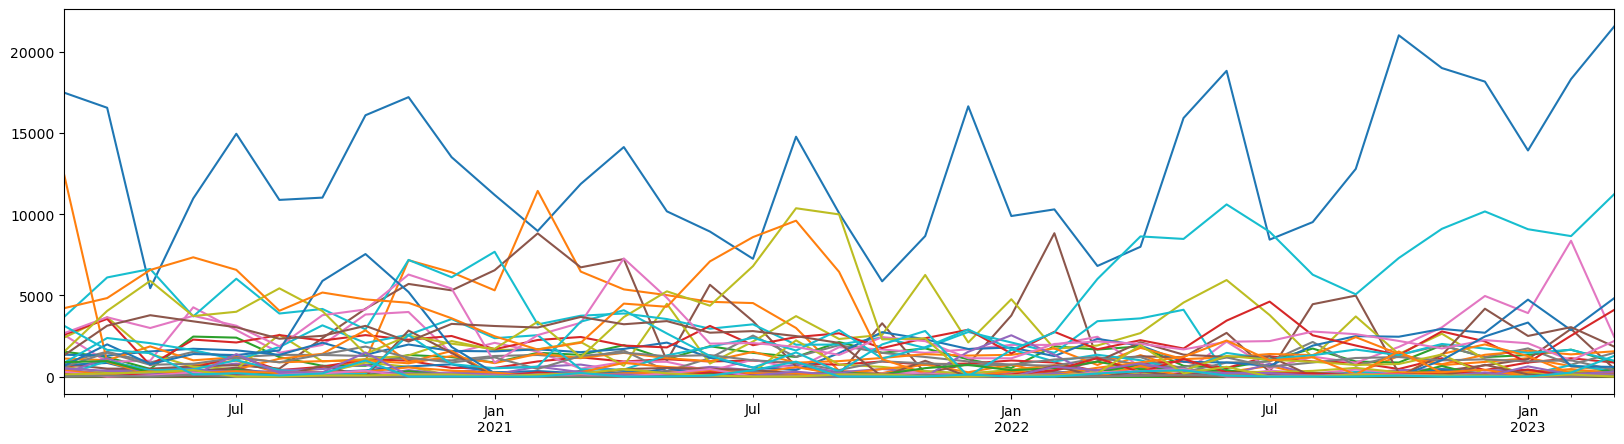

In [17]:
plt.figure(figsize=(20,5))
for ind in range(50):
    df[df.HASH == ind].real_weight.plot()

In [18]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [19]:
df['density'] = df['real_weight'] / df['real_wagon_count']
df.replace(np.inf, 0, inplace=True)
df.fillna({"density":0},inplace=True)
df["int_index"]=df.reset_index().groupby('index').ngroup().values
date_= "2022-05-01"
df_after_date = df[df.index >=pd.to_datetime(date_,yearfirst=True)]
date_start = datetime.strptime(date_, "%Y-%m-%d") - relativedelta(months=len(df_after_date.index.unique()))
df_before_date = df[(df.index<pd.to_datetime(date_,yearfirst=True)) & (df.index >= date_start)]
len(df_after_date.index.unique()) == len(df_before_date.index.unique())

C:\Windows\Temp\ipykernel_24924\102018443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['density'] = df['real_weight'] / df['real_wagon_count']
C:\Windows\Temp\ipykernel_24924\102018443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(np.inf, 0, inplace=True)
C:\Windows\Temp\ipykernel_24924\102018443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

True

In [20]:

model = LinearRegression()

def calculate_regression_for_group_coefficients(df, x, y):
    group_df = df.groupby('HASH')
    coefficients_list = []

    for group_name, group_data in group_df:
        X_group = group_data[f"{x}"].values.reshape(-1, 1)
        y_group = group_data[f'{y}'].values.reshape(-1, 1)
        
        model = LinearRegression()
        model.fit(X_group, y_group)
        coefficient = model.coef_[0][0]

        coefficients_list.append(pd.DataFrame({'HASH': [group_name], 'coefficient': [coefficient]}))

    coefficients_df = pd.concat(coefficients_list, ignore_index=True)
    return coefficients_df

In [21]:
coefficients_df_density_before = calculate_regression_for_group_coefficients(df_before_date,"int_index","density")
coefficients_df_density_after = calculate_regression_for_group_coefficients(df_after_date,"int_index","density")
coefficients_df_density_before.columns = ['HASH',"k_density_before"]
coefficients_df_density_after.columns =  ['HASH',"k_density_after"]

df.reset_index(inplace=True)
df = df.merge(coefficients_df_density_before,on="HASH") \
       .merge(coefficients_df_density_after,on="HASH") 

df_to_cluster = df.groupby(['HASH'],as_index=False).agg({"k_density_before":"max","k_density_after":"max"})

X = df_to_cluster[['k_density_before', 'k_density_after']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_to_cluster['cluster'] = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


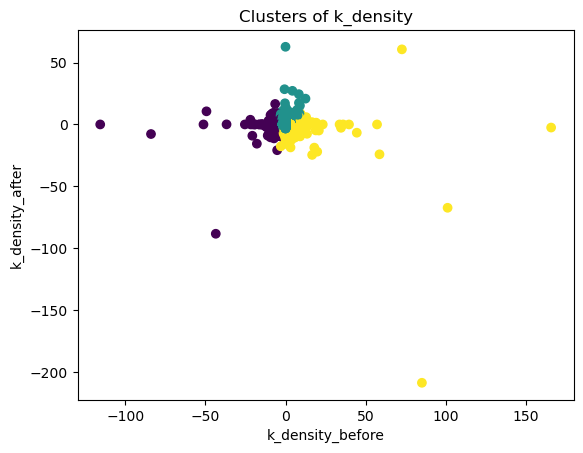

In [22]:
plt.scatter(df_to_cluster['k_density_before'], df_to_cluster['k_density_after'], c=df_to_cluster['cluster'], cmap='viridis')
plt.xlabel('k_density_before')
plt.ylabel('k_density_after')
plt.title('Clusters of k_density')
plt.show()

In [23]:
df_to_cluster = df_to_cluster [['HASH','cluster']]
df = df.merge(df_to_cluster,on="HASH")

In [24]:
df.set_index("index", inplace=True)
df.index.name = None

In [87]:
df.to_parquet("clusters.parquet")